In [4]:
'''
3. Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset.      
Example – predict sentiments based on product reviews b) Apply for prediction 
'''
None

In [5]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# 2. Load dataset
# Here we use IMDB dataset provided by Keras
from tensorflow.keras.datasets import imdb
# Set vocabulary size
vocab_size = 5000

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
# 3. Pad sequences to same length
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [10]:
# 4. Define LSTM Model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

D:\Acadamics\Internship\iGurus\New folder\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
# 5. Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 194s 485ms/step - accuracy: 0.6793 - loss: 0.5733 - val_accuracy: 0.8504 - val_loss: 0.3456
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 194s 496ms/step - accuracy: 0.8596 - loss: 0.3406 - val_accuracy: 0.8537 - val_loss: 0.3560
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 507ms/step - accuracy: 0.8742 - loss: 0.3163 - val_accuracy: 0.8545 - val_loss: 0.3398
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 205s 525ms/step - accuracy: 0.9034 - loss: 0.2480 - val_accuracy: 0.8708 - val_loss: 0.3216
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 210s 539ms/step - accuracy: 0.9328 - loss: 0.1840 - val_accuracy: 0.8647 - val_loss: 0.3248


In [12]:
# 6. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8620 - loss: 0.3272
Test Accuracy: 86.47%


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step


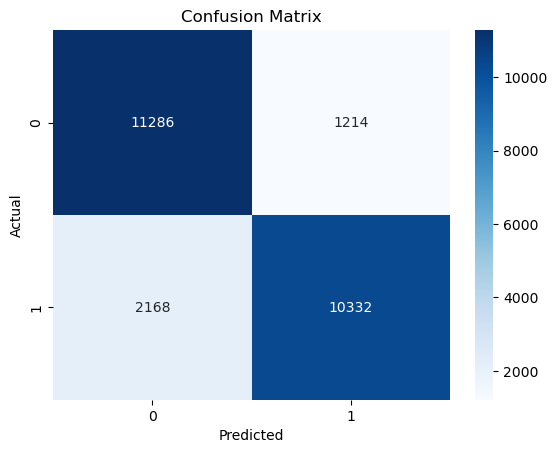

In [13]:
# 7. Predict and Plot Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [17]:
# 8. Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     12500
           1       0.89      0.83      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000



In [15]:
#Explaination

In [ ]:
'''
1. Import Libraries:
We import TensorFlow, Keras layers (Embedding, LSTM, Dense), tools for tokenizing, padding 
sequences, plotting, and evaluating with confusion matrices.

2. Load Dataset:
We use the IMDB movie review dataset, which is perfect for sentiment prediction — each review 
is already encoded into sequences of word indices.
We limit the vocabulary to the 5000 most frequent words for simplicity.

3. Pad Sequences:
Because reviews are different lengths, we pad them to the same size (max_len = 200).
Padding ensures all input samples are of equal size (necessary for LSTM inputs).

4. Define Model:
Embedding layer: Turns each word index into a 128-dimensional dense vector.
First LSTM layer: 128 memory units, returns sequences (because we have stacked LSTM).

Dropout: 50% dropout to prevent overfitting.

Second LSTM layer: 64 memory units.
Another Dropout: 50% again.

Dense output layer: 1 neuron with sigmoid activation (because binary classification: positive/negative).
Model compiled with:
Loss = binary_crossentropy (good for 2-class tasks)

Optimizer = adam

Metrics = accuracy

5. Train Model:
Train the model on training data for 5 epochs, validating on test data after every epoch.
batch_size=64 means 64 samples are processed before updating the weights.

6. Evaluate Model:
We print the test accuracy.

7. Predict + Confusion Matrix:
Predict the test reviews' sentiments and plot a confusion matrix to visually check how many positives and negatives were classified correctly.

8. Classification Report:
Print detailed metrics like precision, recall, and F1-score for both classes.
'''